In [1]:
import tensorflow
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
import seaborn as sns

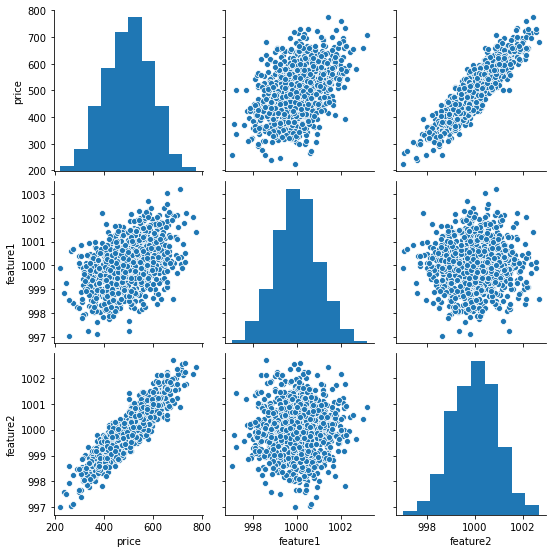

In [5]:
sns.pairplot(df)

In [6]:
x=df.iloc[:,1:3].to_numpy()
y=df.iloc[:,0].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [9]:
minmax.fit(x_train)

MinMaxScaler()

In [10]:
X_train=minmax.transform(x_train)
X_test=minmax.transform(x_test)

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [13]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 804us/step - loss: 258130.3125
Epoch 2/250
25/25 [==============================] - 0s 854us/step - loss: 258028.3438
Epoch 3/250
25/25 [==============================] - 0s 855us/step - loss: 257900.7969
Epoch 4/250
25/25 [==============================] - 0s 918us/step - loss: 257752.2188
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 257560.5938
Epoch 6/250
25/25 [==============================] - 0s 896us/step - loss: 257306.5938
Epoch 7/250
25/25 [==============================] - 0s 854us/step - loss: 256977.7344
Epoch 8/250
25/25 [==============================] - 0s 855us/step - loss: 256550.7812
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 255972.0781
Epoch 10/250
25/25 [==============================] - 0s 820us/step - loss: 255220.5781
Epoch 11/250
25/25 [==============================] - 0s 1ms/step - loss: 254273.5156
Epoch 12/250
25/25 [===========================

25/25 [==============================] - 0s 978us/step - loss: 1985.2273
Epoch 96/250
25/25 [==============================] - 0s 1ms/step - loss: 1978.2004
Epoch 97/250
25/25 [==============================] - 0s 760us/step - loss: 1970.6104
Epoch 98/250
25/25 [==============================] - 0s 736us/step - loss: 1962.7634
Epoch 99/250
25/25 [==============================] - 0s 748us/step - loss: 1954.9042
Epoch 100/250
25/25 [==============================] - 0s 739us/step - loss: 1947.3661
Epoch 101/250
25/25 [==============================] - 0s 861us/step - loss: 1939.7178
Epoch 102/250
25/25 [==============================] - 0s 746us/step - loss: 1931.3824
Epoch 103/250
25/25 [==============================] - 0s 684us/step - loss: 1923.5808
Epoch 104/250
25/25 [==============================] - 0s 802us/step - loss: 1915.4044
Epoch 105/250
25/25 [==============================] - 0s 698us/step - loss: 1907.5785
Epoch 106/250
25/25 [==============================] - 0s 699us

25/25 [==============================] - 0s 798us/step - loss: 1029.8491
Epoch 190/250
25/25 [==============================] - 0s 771us/step - loss: 1017.2026
Epoch 191/250
25/25 [==============================] - 0s 719us/step - loss: 1005.1490
Epoch 192/250
25/25 [==============================] - 0s 755us/step - loss: 993.9703
Epoch 193/250
25/25 [==============================] - 0s 828us/step - loss: 982.3650
Epoch 194/250
25/25 [==============================] - 0s 819us/step - loss: 970.0255
Epoch 195/250
25/25 [==============================] - 0s 663us/step - loss: 958.3002
Epoch 196/250
25/25 [==============================] - 0s 653us/step - loss: 946.3104
Epoch 197/250
25/25 [==============================] - 0s 702us/step - loss: 934.6205
Epoch 198/250
25/25 [==============================] - 0s 796us/step - loss: 922.5664
Epoch 199/250
25/25 [==============================] - 0s 911us/step - loss: 911.3819
Epoch 200/250
25/25 [==============================] - 0s 761us/s

In [14]:
loss_df=pd.DataFrame(model.history.history)

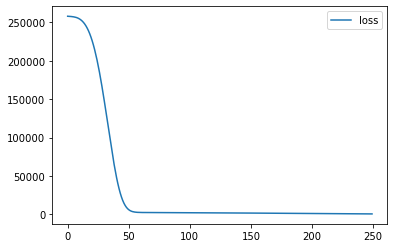

In [15]:
loss_df.plot()

In [16]:
model.evaluate(X_test,y_test,verbose=0)

336.049072265625

In [17]:
model.evaluate(X_train,y_train,verbose=0)

368.82440185546875

In [36]:
test_predictions=model.predict(X_test)

In [37]:
test_predictions=pd.Series(test_predictions.reshape(200,))

In [38]:
test_predictions

0      438.952881
1      460.437164
2      548.012329
3      555.593872
4      476.191772
          ...    
195    394.374451
196    553.507996
197    330.633423
198    382.291779
199    530.570557
Length: 200, dtype: float32

In [39]:
pred_df=pd.DataFrame(y_test,columns=['y_test'])

In [40]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [42]:
pred_df.columns=['y_test_true','y_test_pred']

In [43]:
pred_df

,y_test_true,y_test_pred
0,434.275283,438.952881
1,449.797212,460.437164
2,555.420871,548.012329
3,562.057936,555.593872
4,480.806940,476.191772
...,...,...
195,372.777436,394.374451
196,565.025409,553.507996
197,296.989847,330.633423
198,355.795352,382.291779


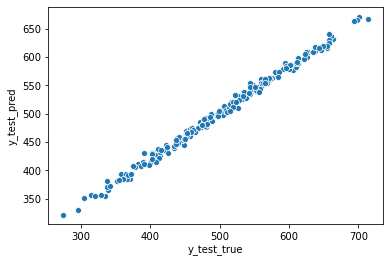

In [44]:
sns.scatterplot(x='y_test_true',y='y_test_pred',data=pred_df)

In [55]:
new_data=[[900,900]]

In [56]:
new_data=minmax.transform(new_data)

In [57]:
new_data

array([[-15.78290641, -17.10483572]])

In [58]:
y_new_predict=model.predict(new_data)

In [59]:
y_new_predict

array([[24.898083]], dtype=float32)

In [61]:
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [62]:
later_model=load_model('my_gem_model.h5')

In [64]:
later_model.predict(new_data)

array([[24.898083]], dtype=float32)

In [65]:
from sklearn.metrics import mean_absolute_error

In [66]:
mean_absolute_error(pred_df['y_test_true'],pred_df['y_test_pred'])

14.987368864282368